In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles


<H1>CREAMOS LA DATA QUE VAMOS A UTILIZAR PARA EL ENTRENAMIENTO</H1>

In [5]:
N=1000
gaussian_quantiles=make_gaussian_quantiles(mean=None, 
                        cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None
                        )

X,Y = gaussian_quantiles


In [6]:
Y = Y[:, np.newaxis]

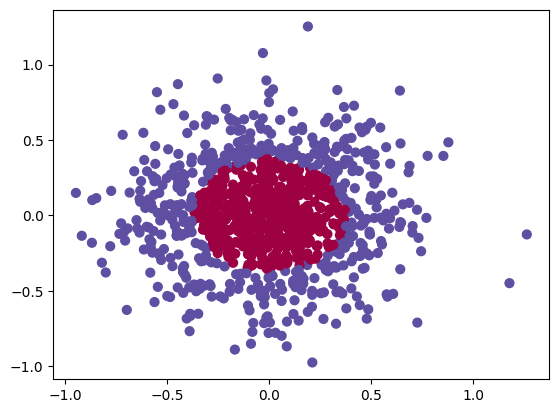

In [7]:
plt.scatter(X[:,0],X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

<H1>FUNCIONES DE ACTIVACION</H1>

In [8]:
#Funcion sigmoid

def sigmoid(x, derivate=False):
  if derivate:
    return np.exp(-x)/((np.exp(-x)+1)**2)
  else:
    return 1/(1+np.exp(-x))

In [9]:
#Funcion relu

def relu(x, derivate=False):
  if derivate:
    x[x<=0]=0
    x[x>0]=1
    return x
  else:
    return np.maximum(0,x)


<H1> FUNCION DE PERDIDA</H1>

In [10]:
#Mean squared error

def mse(y, y_hat, derivate=False):
  if derivate:
    return(y_hat - y)
  else:
    return np.mean((y_hat - y)**2)


<H1>CREACION DE LA ESTRUCTURA DE LA RED NEURONAL</H1>

La siguiente funcion crea las capas tanto ocultas como de salida ademas de proporcionar un peso y un bias para cada neurona

In [11]:
#generamos capas de forma aleatoria

def initialize_parameters_deep(layers_dim):
  parameters={}
  L=len(layers_dim)
  for l in range(0,L-1):
    parameters['W'+str(l+1)]=(np.random.rand(layers_dim[l], layers_dim[l+1])*2)-1
    parameters['b'+str(l+1)]=(np.random.rand(1, layers_dim[l+1])*2)-1
  return parameters

In [12]:
layer_dims=[2,4,8,1] #arquitectura de la red neuronal
params=initialize_parameters_deep(layer_dims) 

In [ ]:
params


<H1>A CONTINUACION INICIAMOS CON EL ENTRENAMIENTO FORWARD</H1>

Consiste en tomar los valores de entrada y multiplicarlos en producto punto por los pesos aleatorios que tienen cada neurona en la red neuronal, es de esperar que la prediccion sea mala y el error de perdida sea alto debido a que iniciamos con valores aleatorios. Despues evaluaremos la perdida, hacer las derivadas parciales, optimizar con el gradient descent y actualizar los pesos una y otra vez hasta que encajen.


In [14]:
params['W1'].shape

(2, 4)

In [15]:
X.shape

(1000, 2)

Si nos fijamos el numero de columnas de la capa coincide con el numero de filas de los valores de entrada.

In [16]:
np.matmul(X,params['W1']).shape
# esta operacion tambien podemos escribirla de la siguiente forma
# X@params['W1'].shape


(1000, 4)

En la celda anterior realizamos la multiplicacion y observamos que el resultado nos servira para multiplicarlo con la siguiente capa, es asi como lo haremos a continuación con todas las capas.

In [17]:
def train(x_data,lr,params,training=True):

  ##Forward
  params['A0']= x_data

  params['Z1']=np.matmul(params['A0'],params['W1'])+params['b1']
  params['A1']=relu(params['Z1'])

  params['Z2']=np.matmul(params['A1'],params['W2'])+params['b2']
  params['A2']=relu(params['Z2'])

  params['Z3']=np.matmul(params['A2'],params['W3'])+params['b3']
  params['A3']=sigmoid(params['Z3'])

  output=params['A3']

  if training:
    ##Backpropagation

    #Aqui propagamos el error 
    #Calculamos los deltas 
    #fijarnos como se utiliza la transpuesta para que coincidan columnas y filas y se pueda hacer el producto punto

    params['dZ3']=mse(Y,output,True) * sigmoid(params['A3'],True)
    params['dW3']=np.matmul(params['A2'].T,params['dZ3'])

    params['dZ2']=np.matmul(params['dZ3'], params['W3'].T)*relu(params['A2'],True)
    params['dW2']=np.matmul(params['A1'].T,params['dZ2'])

    params['dZ1']=np.matmul(params['dZ2'], params['W2'].T)*relu(params['A1'],True)
    params['dW1']=np.matmul(params['A0'].T,params['dZ1'])

    ##Gradient descent

    #Actualizamos los pesos de la red neuronal

    params['W3']=params['W3'] - params['dW3'] * lr #aqui aparece el learning rate
    params['b3']=params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr

    params['W2']=params['W2'] - params['dW2']*0.0001 
    params['b2']=params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr

    params['W1']=params['W1'] - params['dW1']*0.0001 
    params['b1']=params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr

  return output

In [ ]:
layer_dims=[2,4,8,1] #arquitectura de la red neuronal
params=initialize_parameters_deep(layer_dims) 
errors=[]
#ahora vamos a entrenar
for _ in range(20000): #se ajusta el numero de iteraciones o epochs
  output=train(X,0.00001,params) #tambien se ajusta el learning rate hasta obtener la convergencia deseada
  if _ % 50==0:
    print(mse(Y,output))
    errors.append(mse(Y,output))

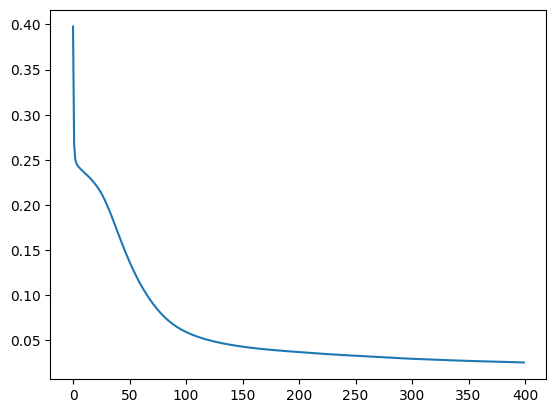

In [30]:
plt.plot(errors)

Ahora preparamos la data de prueba, similar a la que hicimos en la data de entrenamiento PERO sin clasificar

In [31]:
data_test=(np.random.rand(1000,2)*2)-1
y=train(data_test,0.0001,params,training=False)


In [32]:
y=np.where(y>= 0.5,1 , 0)


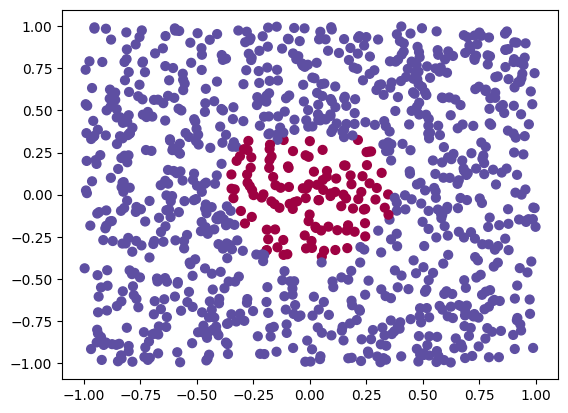

In [33]:
plt.scatter(data_test[:,0],data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)